<a href="https://colab.research.google.com/github/ziyasarican/Python/blob/main/Araba_fiyat%C4%B1_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [96]:
df = pd.read_excel("merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [60]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [17]:
# check is there null value
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


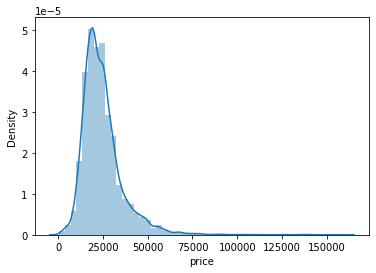

In [20]:
sbn.distplot(df["price"])

# The number of high-priced cars is actually few. 
# We can lower the average by removing some of the highest priced cars from the dataset. 
# In this way, we can find a more accurate result.

In [84]:
# We can see correlation relationship
df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


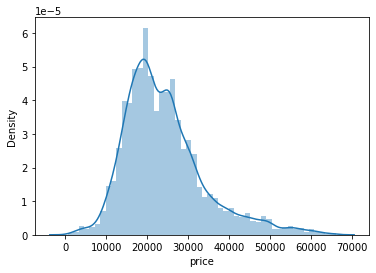

In [97]:
# I removed first 131 highest priced items
# 131 = %1 of dataset. So we don't break structure of dataset
df = df.sort_values(by = "price", ascending = False)
df = df.drop(df.index[0:131])
sbn.distplot(df["price"])
df.describe()

In [98]:
# For a more accurate result, we can drop the year 1970. 
# Because it distorts the year-price correlation.
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [99]:
df = df[df.year != 1970]
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [121]:
# I removed transmission column
# because its not int
df = df.drop("transmission", axis = 1)
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [122]:
# y = wx + b
# y: label
y = df["price"].values

# x: features
x = df.drop("price", axis = 1).values

In [123]:
from sklearn.model_selection import train_test_split

In [147]:
# We separate data as train-test
# 0.33 means: %33 of datas = test
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.30, random_state=10)

In [148]:
len(x_train)

9090

In [149]:
len(x_test)

3897

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [151]:
# For create model
from tensorflow.keras.models import Sequential
# For create layers
from tensorflow.keras.layers import Dense

In [165]:
# create model
# 12 neurons, 5 layers
model = Sequential()

model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))

model.add(Dense(1))

# adam optimizer is more efficient mostly
model.compile(optimizer = "adam", loss="mse")


In [166]:
# training

# validation: auto compare(validate) result of x_test-y_test with training
# batch_size: partly test, not all of them in one part
model.fit (x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=300, epochs=350)

Epoch 1/350
31/31 [==============================] - 1s 8ms/step - loss: 672140992.0000 - val_loss: 688095808.0000
Epoch 2/350
31/31 [==============================] - 0s 3ms/step - loss: 672107520.0000 - val_loss: 688026944.0000
Epoch 3/350
31/31 [==============================] - 0s 3ms/step - loss: 671957696.0000 - val_loss: 687732096.0000
Epoch 4/350
31/31 [==============================] - 0s 3ms/step - loss: 671372096.0000 - val_loss: 686634880.0000
Epoch 5/350
31/31 [==============================] - 0s 3ms/step - loss: 669288704.0000 - val_loss: 682884672.0000
Epoch 6/350
31/31 [==============================] - 0s 3ms/step - loss: 662897088.0000 - val_loss: 672306048.0000
Epoch 7/350
31/31 [==============================] - 0s 3ms/step - loss: 646185664.0000 - val_loss: 646248768.0000
Epoch 8/350
31/31 [==============================] - 0s 3ms/step - loss: 607964800.0000 - val_loss: 590526208.0000
Epoch 9/350
31/31 [==============================] - 0s 3ms/step - loss: 5329733

In [167]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,672140992.0,688095808.0
1,672107520.0,688026944.0
2,671957696.0,687732096.0
3,671372096.0,686634880.0
4,669288704.0,682884672.0


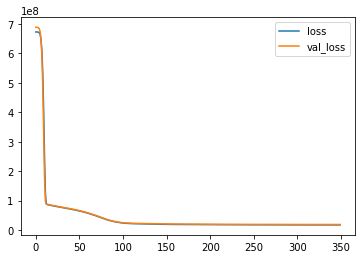

In [168]:
lossData.plot()

In [169]:
# programın çıktılarını eldeki gerçek y_test ile kontrol et
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [170]:
 # modele x_test sonuçlarının tahminlerini gönderiyoruz
predictArr = model.predict(x_test)

# tahminler ile gerçek y_testleri karşılaştırıyoruz
mean_absolute_error(y_test, predictArr)

# arada 3104 paundluk sapma var

122/122 [==============================] - 0s 1ms/step


3104.504942516379

In [171]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000
